   gfs_lat  gfs_lon     trend
0    48.50    14.25  0.096386
1    48.50    14.50  0.145251
2    48.50    14.75  0.000000
3    48.50    17.00  0.000000
4    48.75    13.75  0.132353


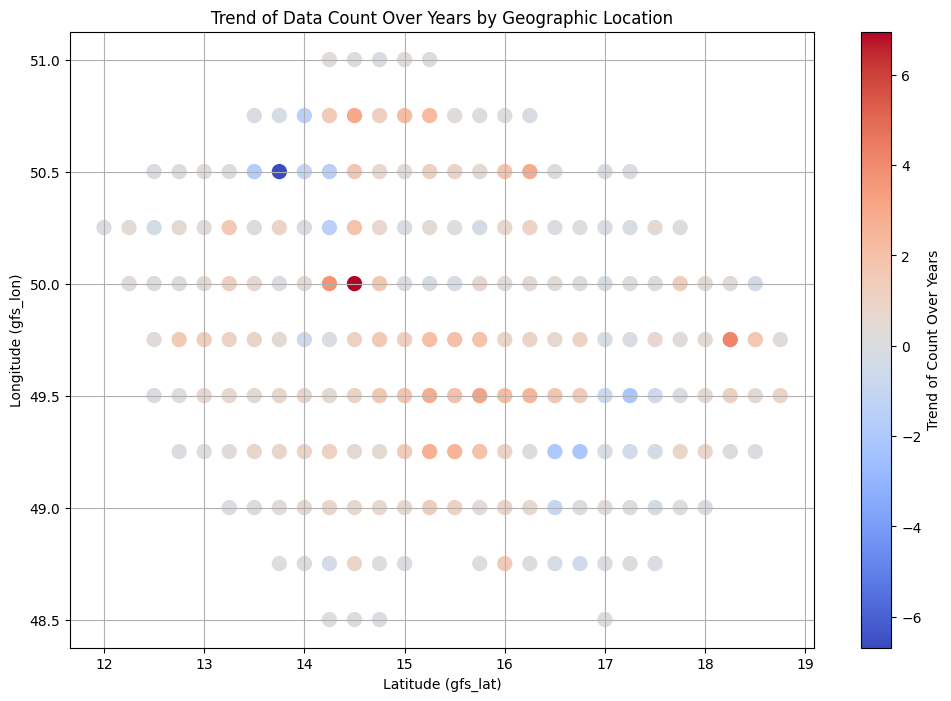

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming 'result' is your dataframe and it has the columns 'ohlaseni', 'gfs_lat', and 'gfs_lon'
result = pd.read_csv('/content/Pozary_GFS_mergekeys.csv')

result['ohlaseni'] = pd.to_datetime(result['ohlaseni'])
# Extract the year from the 'ohlaseni' datetime column
result['year'] = result['ohlaseni'].dt.year

# Group by 'gfs_lat', 'gfs_lon', and 'year' and count the occurrences
grouped_data = result.groupby(['gfs_lat', 'gfs_lon', 'year']).size().reset_index(name='count')

# Initialize a list to store trends
trends = []

# Loop through each unique combination of 'gfs_lat' and 'gfs_lon'
for (lat, lon), group in grouped_data.groupby(['gfs_lat', 'gfs_lon']):
    # Prepare the data for linear regression
    X = group['year'].values.reshape(-1, 1)
    y = group['count'].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the slope (trend) of the regression line
    trend = model.coef_[0]

    # Store the results
    trends.append({'gfs_lat': lat, 'gfs_lon': lon, 'trend': trend})

# Convert trends to a DataFrame
trends_df = pd.DataFrame(trends)

# Print the first few rows of the trends DataFrame to verify
print(trends_df.head())

# Plot the trends
plt.figure(figsize=(12, 8))
scatter = plt.scatter(trends_df['gfs_lon'],trends_df['gfs_lat'], c=trends_df['trend'], cmap='coolwarm', s=100)
plt.colorbar(scatter, label='Trend of Count Over Years')
plt.xlabel('Latitude (gfs_lat)')
plt.ylabel('Longitude (gfs_lon)')
plt.title('Trend of Data Count Over Years by Geographic Location')
plt.grid(True)
plt.show()